# ***E-Commerce – EDA – Python Project 2***

***Context of Data
 Company - UK-based and registered non-store online retail
 Products for selling - Mainly all-occasion gifts
 Customers - Most are wholesalers (local or international)
 Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
import gc
import datetime
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/NAVNATH BULKUNDE/Desktop/MY STUFF/python/Python Assignment 2_BI/ecommerce.csv"')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# ***1. Perform Basic EDA***

***a. Boxplot – All Numeric Variables***

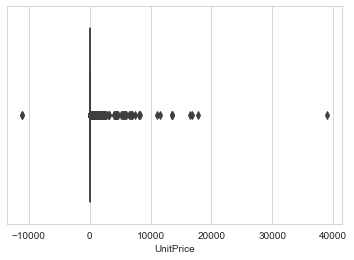

In [11]:
sns.boxplot(df["UnitPrice"]);

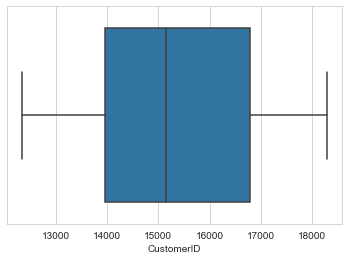

In [12]:
sns.boxplot(df["CustomerID"]);

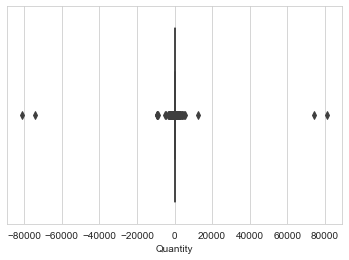

In [13]:
sns.boxplot(df["Quantity"]);

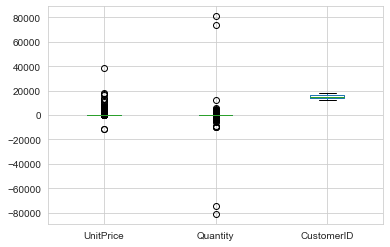

In [14]:
df.boxplot(column=["UnitPrice","Quantity","CustomerID"]);

***b. Histogram – All Numeric Variables***

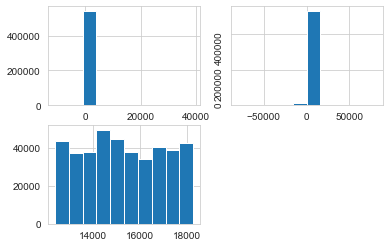

In [15]:
plt.subplot(2,2,1)
plt.hist(df["UnitPrice"])
plt.show;
plt.subplot(2,2,2)
plt.hist(df["Quantity"])
plt.yticks(rotation=90)
plt.show;
plt.subplot(2,2,3)
plt.hist(df["CustomerID"])
plt.show;

***c. Distribution Plot – All Numeric Variables***

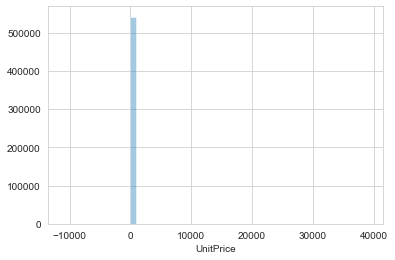

In [16]:
sns.distplot(df.UnitPrice, kde=False);

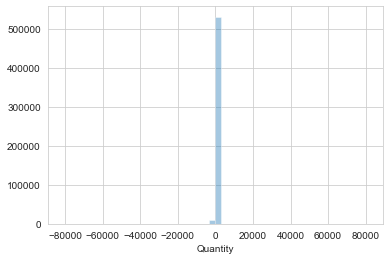

In [17]:
sns.distplot(df.Quantity, kde=False);

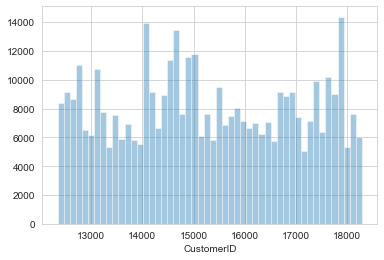

In [18]:
sns.distplot(df.CustomerID, kde=False);

***d. Aggregation for all numerical Columns***

In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
A = x=df[["UnitPrice","Quantity","CustomerID"]]

In [21]:
A.head()

,UnitPrice,Quantity,CustomerID
0,2.55,6,17850.0
1,3.39,6,17850.0
2,2.75,8,17850.0
3,3.39,6,17850.0
4,3.39,6,17850.0


In [22]:
A.tail()

,UnitPrice,Quantity,CustomerID
541904,0.85,12,12680.0
541905,2.10,6,12680.0
541906,4.15,4,12680.0
541907,4.15,4,12680.0
541908,4.95,3,12680.0


In [23]:
A.sum()

UnitPrice     2.498804e+06
Quantity      5.176450e+06
CustomerID    6.219476e+09
dtype: float64

In [24]:
A.mean()

UnitPrice         4.611114
Quantity          9.552250
CustomerID    15287.690570
dtype: float64

In [25]:
A.mode()

,UnitPrice,Quantity,CustomerID
0,1.25,1,17841.0


In [26]:
A.median()

UnitPrice         2.08
Quantity          3.00
CustomerID    15152.00
dtype: float64

In [27]:
A.max()

UnitPrice     38970.0
Quantity      80995.0
CustomerID    18287.0
dtype: float64

In [28]:
A.min()

UnitPrice    -11062.06
Quantity     -80995.00
CustomerID    12346.00
dtype: float64

***e. Unique Values across all columns***

In [29]:
df.nunique

<bound method DataFrame.nunique of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Cust

In [30]:
df.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

***f. Duplicate values across all columns***

In [31]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [32]:
df = df.drop_duplicates()

In [33]:
df.shape

(536641, 8)

In [34]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


***Correlation – Heatmap - All Numeric Variables***

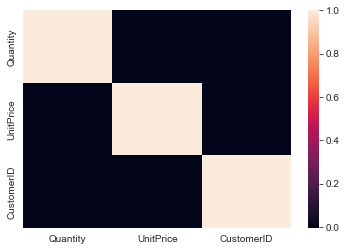

In [35]:
dataplot=sns.heatmap(df.corr())

***. Check for missing values in all columns and replace them with the appropriate metric
(Mean/Median/Mode)***

In [36]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [37]:
x=df["CustomerID"].mean()
type(x)

float

In [38]:
int(x)

15281

In [39]:
df['CustomerID']=df["CustomerID"].fillna(x)

In [40]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

***Remove duplicate rows***

In [43]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


***Remove rows which have negative values in Quantity column***

In [44]:
(df["Quantity"]<0).sum()

9725

In [45]:
df.drop(df[df["Quantity"]<0].index,inplace=True)

In [46]:
df.shape

(525462, 8)

***Add the columns - Month, Day and Hour for the invoice**

In [54]:
import datetime as dt

In [55]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [58]:
df.head()

,InvoiceNo,StockCode,Year_month,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


***How many orders made by the customers?***

In [59]:
df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


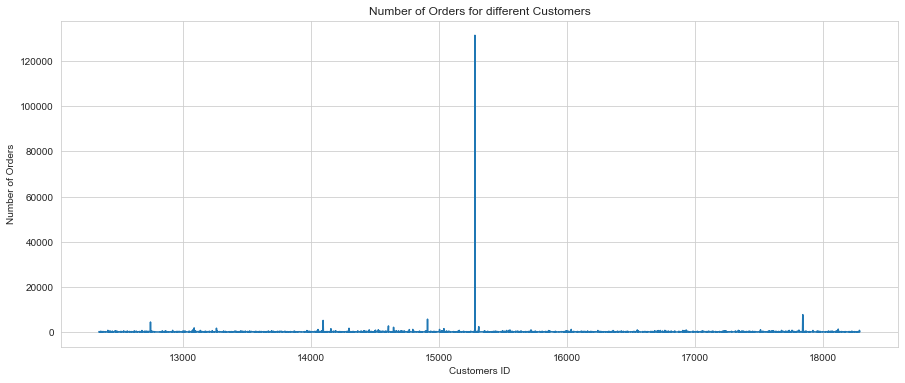

In [60]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

***TOP 5 customers with higher number of orders***

In [64]:
orders['CustomerID'] = orders['CustomerID'].astype('int64')

In [65]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
2174,15281,United Kingdom,131324
4028,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413


***How much money spent by the customers?***

In [66]:
df['Amount_Spent'] = df['Quantity'] * df['UnitPrice']

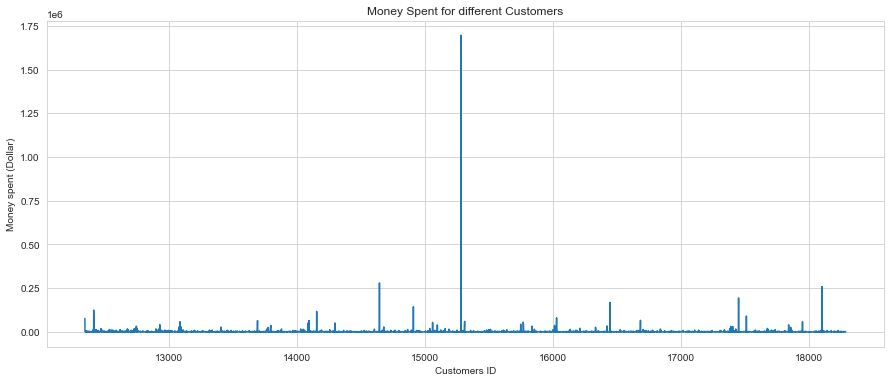

In [67]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

***TOP 5 customers with highest money spent**

In [68]:
money_spent.sort_values(by='Amount_Spent', ascending=False).head()

,CustomerID,Country,Amount_Spent
2174,15281.160818,United Kingdom,1694595.33
1698,14646.000000,Netherlands,280206.02
4219,18102.000000,United Kingdom,259657.30
3746,17450.000000,United Kingdom,194390.79
3026,16446.000000,United Kingdom,168472.50


***How many orders per month?***

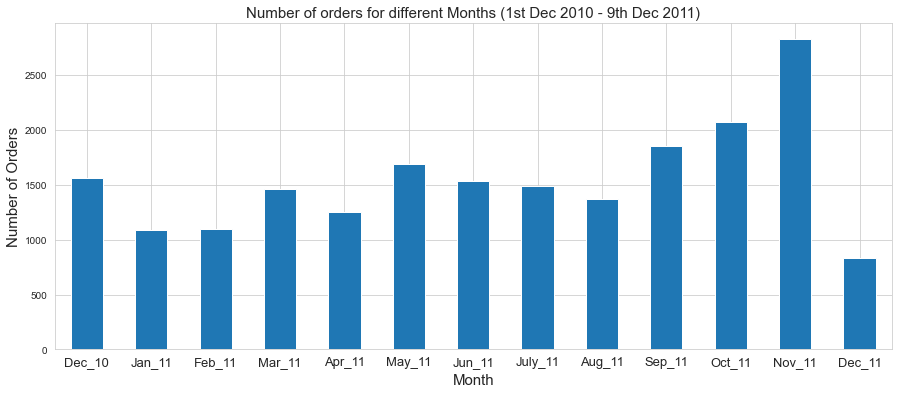

In [69]:
ax = df.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

***How many orders per day?***

In [70]:
ax = df.groupby('InvoiceNo')['Day'].value_counts()
ax

InvoiceNo  Day
536365     3       7
536366     3       2
536367     3      12
536368     3       4
536369     3       1
                  ..
581586     5       4
581587     5      15
A563185    5       1
A563186    5       1
A563187    5       1
Name: Day, Length: 20136, dtype: int64

In [71]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts()
#.value_counts().sort_index()

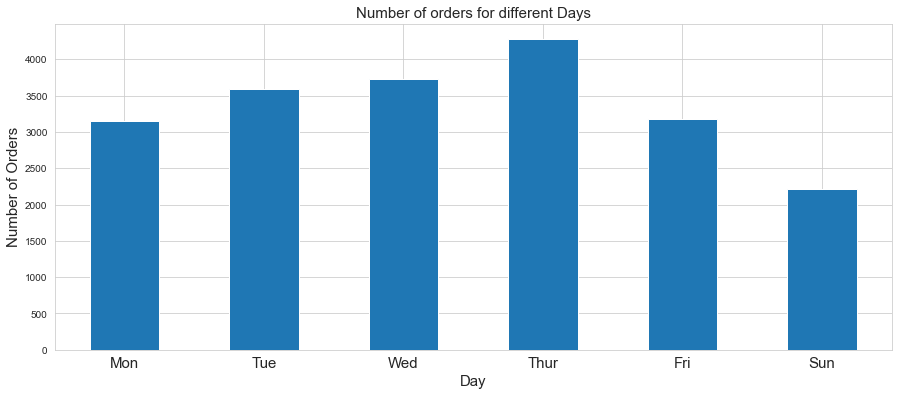

In [72]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

***How many orders per hour?***

In [73]:
a=df['Hour'].value_counts().sort_index()

In [75]:
ax= df.groupby('InvoiceNo')['Hour'].unique().value_counts()

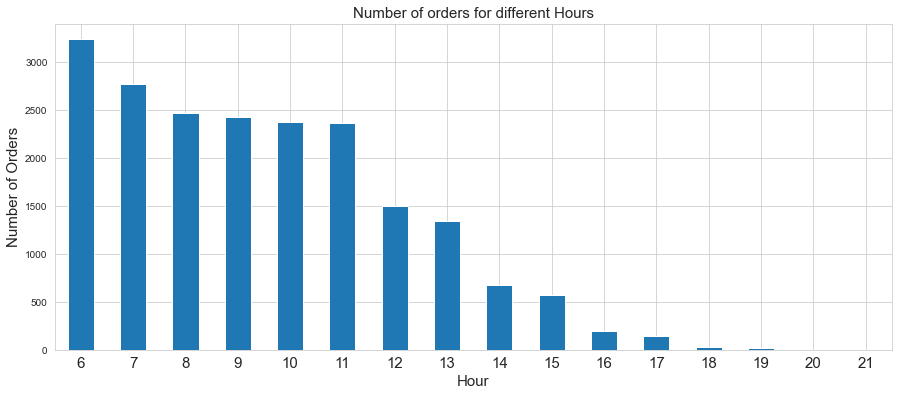

In [76]:
ax= df.groupby('InvoiceNo')["Hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,22), rotation='horizontal', fontsize=15)
plt.show()

*** How many orders for each country?***

In [77]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
group_country_orders

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  280
Israel                     292
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                442
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1072
Australia                 1184
Portugal                  1492
Switzerland               1959
Belgium                   2031


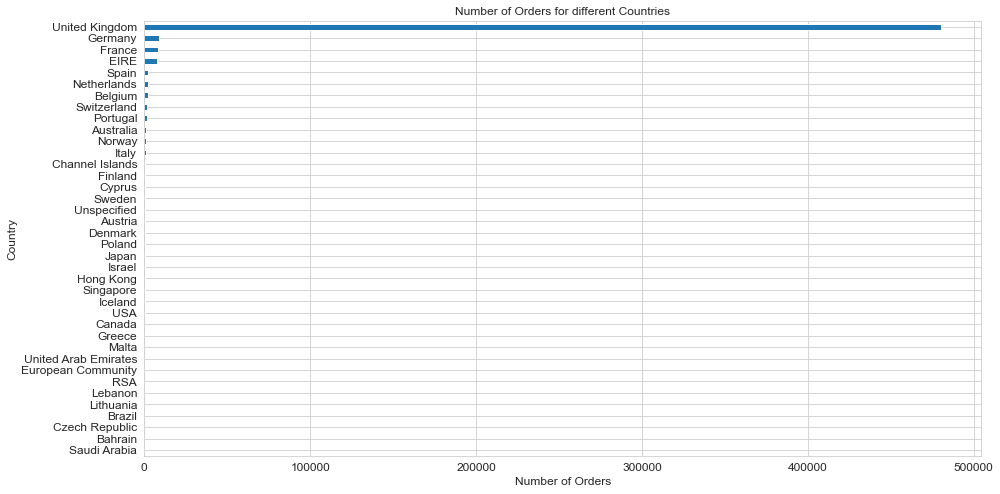

In [78]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

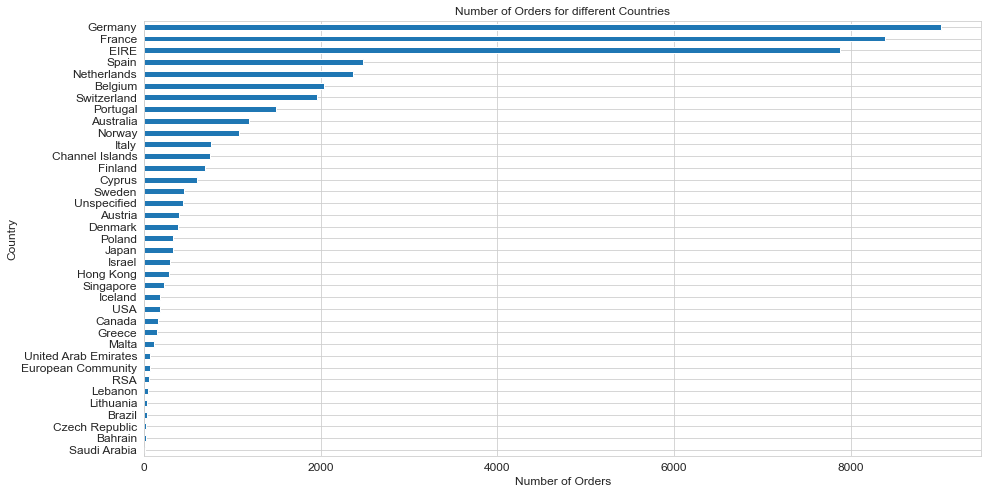

In [79]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']
# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

***How much money spent by each country?***

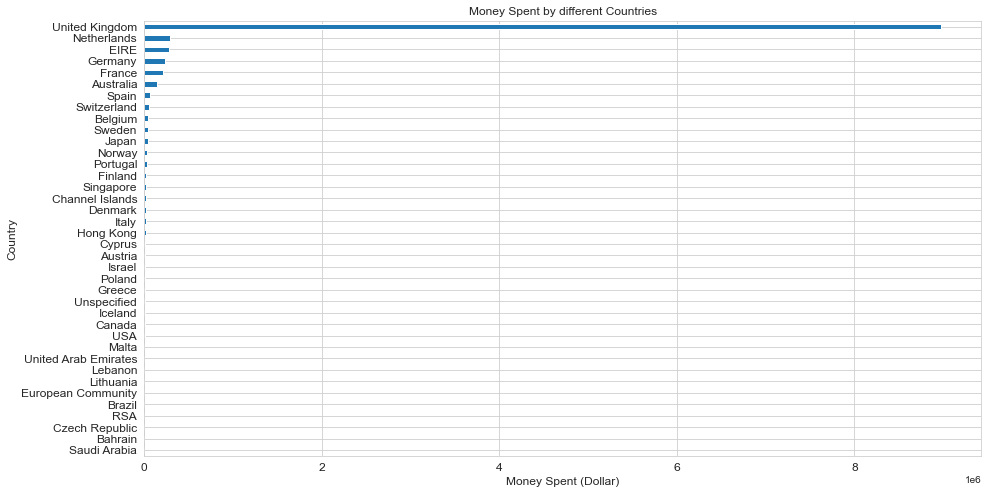

In [80]:
group_country_amount_spent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()